# **Setup**

**Maxar Data**
* https://www.maxar.com/open-data

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


import os
import datetime as dt
import urllib
from IPython.display import clear_output
import regex as re

In [48]:
# Geospatial Packages
import rasterio
import rasterio.features
from rasterio.plot import show 
from rasterio.windows import Window

## **Change Directory**

In [13]:
# Check Current Working Directory
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Geospatial\\08 Maxar Remote Sensing Data Source'

In [14]:
# Change Working Directory
os.chdir('C:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Geospatial\\08 Maxar Remote Sensing Data Source')

## **Create Folders**

In [16]:
# Create Folder List 
Folder_Name_List = []

# Specify Directory Folders
folder_input_data = 'Input Data'
folder_output_data = 'Output Data'

Folder_Name_List.append(folder_input_data)
Folder_Name_List.append(folder_output_data)
print('No. Of Folders: ',len(Folder_Name_List))

No. Of Folders:  2


In [17]:
# Create Folders In Directory If Not Created
# Required Only While Running First Time On A New System
for folder_name in Folder_Name_List:
    if os.path.exists(folder_name):
        pass
    else:
        os.makedirs(folder_name)
        print(f'Created New Folder! - {folder_name}')

Created New Folder! - Input Data
Created New Folder! - Output Data


# **Data Import**

## **Event Date**

In [7]:
# Sikkim Flood Event Date
Event_Date01 = dt.datetime(year=2023,month=10,day=4)
Event_Date01

datetime.datetime(2023, 10, 4, 0, 0)

## **Read File Names List**

In [19]:
# Maxar image url info text file location
with open('Event File Names List.txt','r') as file: 
    File_Source_Links = file.readlines()

# ARD = Analysis Ready Data

# Display Sample Links
for link in File_Source_Links[0:5]:
    print(link)

  https://maxar-opendata.s3.us-west-2.amazonaws.com/events/India-Floods-Oct-2023/ard/45/120220122221/2022-03-07/10300100CE8D0400-visual.tif

  https://maxar-opendata.s3.us-west-2.amazonaws.com/events/India-Floods-Oct-2023/ard/45/120220122220/2022-03-07/10300100CE8D0400-visual.tif

  https://maxar-opendata.s3.us-west-2.amazonaws.com/events/India-Floods-Oct-2023/ard/45/120220122203/2022-03-07/10300100CE8D0400-visual.tif

  https://maxar-opendata.s3.us-west-2.amazonaws.com/events/India-Floods-Oct-2023/ard/45/120220122202/2022-03-07/10300100CE8D0400-visual.tif

  https://maxar-opendata.s3.us-west-2.amazonaws.com/events/India-Floods-Oct-2023/ard/45/120220122201/2022-03-07/10300100CE8D0400-visual.tif



# **Download GeoTIFF Files**

In [24]:
# File Name Extraction Pattern
filename_re_Pattern = r'(\w*[^\/]\w*\.*\w*\.(tif|tiff))'

In [43]:
for i,Link in enumerate(File_Source_Links):
    clear_output(wait=True)
    print('File {} of {}'.format(i+1,len(File_Source_Links)))
    print(Link)
    
    # Get File Name
    File_Name = re.findall(filename_re_Pattern,Link)[0][0]
    print(File_Name)

    # Create File Path
    File_Path = os.path.join(folder_input_data,File_Name)
    # print(File_Path)

    if not os.path.isfile(File_Path):
        urllib.request.urlretrieve(Link,File_Path)
        print('File Download Completed!')
        print('\n')
    else:
        print('File Already Exists')
        print('\n')

File 52 of 52
      


IndexError: list index out of range

# **Open GeoTIFF Files**

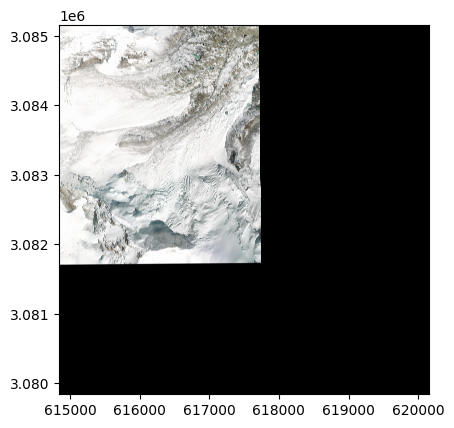

<Axes: >

In [49]:
# Read File
File_00_Path = os.path.join(folder_input_data,'1050010036A0EC00-visual - Direct Download.tif')
File_00 = rasterio.open(File_00_Path)

# Show File
show(File_00)

# Close File
# File_00.close()

## **CRS & Bounds**

In [56]:
File_00. crs

CRS.from_epsg(32645)

In [57]:
File_00.bounds

BoundingBox(left=614843.75, bottom=3079843.75, right=620156.25, top=3085156.25)

# **Band 01**

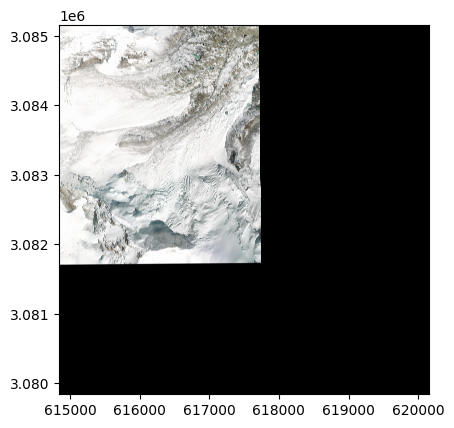

<Axes: >

In [61]:
show(File_00)

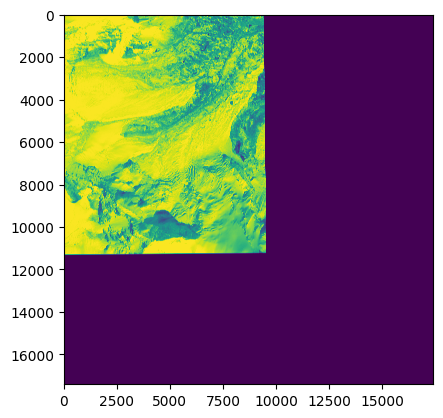

<Axes: >

In [59]:
show(File_00.read(1))